In [131]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
%matplotlib inline

In [132]:
dist = np.array([2.67, 7.91, 13.40, 19.14, 24.32, 35.25, 46.35])
fluor_ratio = 1-np.array([0.0041, 0.0773, 0.2574, 0.5339, 0.7224, 0.9064, 0.9689])
# took 1- donor fluorescence as acceoter fluorescence

## HW Part A

We define the distance between the two planes as $d = \sqrt{r^2+z^2}$, and we look for an analogous expression in this case for $\beta_{FRET}$ to express the probability of energy transfer 

Given that the donor could interact with any acceptor in the plane, we can express the probability in some unit time as the integral over the xy plane, multiplied by the receptor density $\rho$ on that plane (assumed to be constant), and by some proportionality constant, Q, to the inverse of $d^6$ 

$\beta_{FRET} = dt \int (xy ~~ plane) (\rho) Q d^{-6}$ 

Switching to Polar Coordinates, we have that that the xy plane can be expressed as $rdrd\theta$:

$\beta_{FRET} = dt \int_0^{2\pi} \int_0^\infty  r dr d\theta (\rho) Q d^{-6}$: 

We can pull out the theta integral and the constants, and also let $u=d^2$, $du = 2rdr$:

$\beta_{FRET} = (dt) (\pi)(\rho) (Q) \int_{z^2}^\infty  \dfrac{du}{u^3}$

This gives: $\beta_{FRET} = (dt) (\pi)(\rho) (Q) * -\dfrac{1}{2} (\infty^{-2}-z^{-4}) = (dt) (\pi)(\rho) (Q) \dfrac{1}{2} * z^{-4}$

Letting $A^{\frac{1}{4}} = \frac{1}{2} \pi \rho Q$, we get:

$\beta_{FRET} = \dfrac{A^4}{z^4}$

$\varepsilon_{FRET} = \dfrac{\beta_{FRET}}{\beta_{FRET} + \beta dt} = \dfrac{\dfrac{A^4}{z^4}}{\dfrac{A^4}{z^4} + \beta} = \dfrac{1}{1+\dfrac{\beta}{A^4}z^4}$

Letting some new constant $r_{new} = \dfrac{\beta}{A^4}$: 

$\varepsilon_{FRET} = \dfrac{1}{1 + r_{new}z^4}$

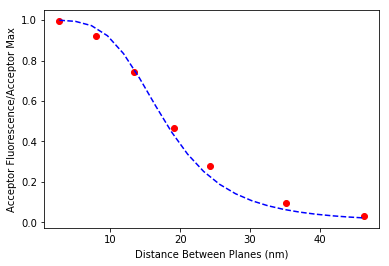

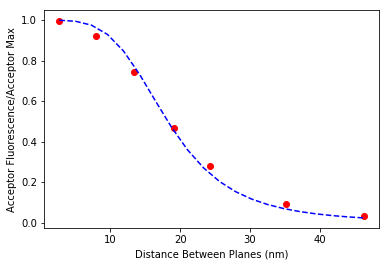

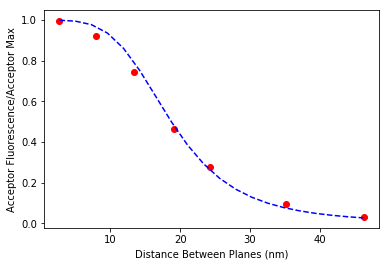

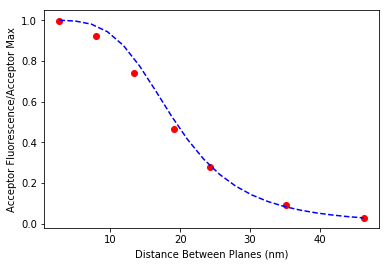

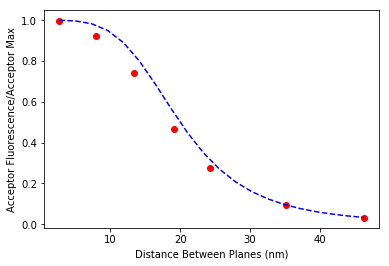

In [146]:
def E_fret(rfnew, z):
    return 1/(1+ (rfnew*(z**4)))

# ballpark estimate for rnew value determined from plugging in two points from data to the formula
for rnew in np.linspace(1e-05, 6.25e-06, 5):
    z_vals = np.linspace(min(dist), max(dist), 20)
    e_vals = E_fret(rnew, z_vals)

    plt.figure()
    plt.plot(dist, fluor_ratio, 'ro')
    plt.plot(z_vals, e_vals, 'b--')
    plt.ylabel("Acceptor Fluorescence/Acceptor Max")
    plt.xlabel("Distance Between Planes (nm)")


    plt.show()

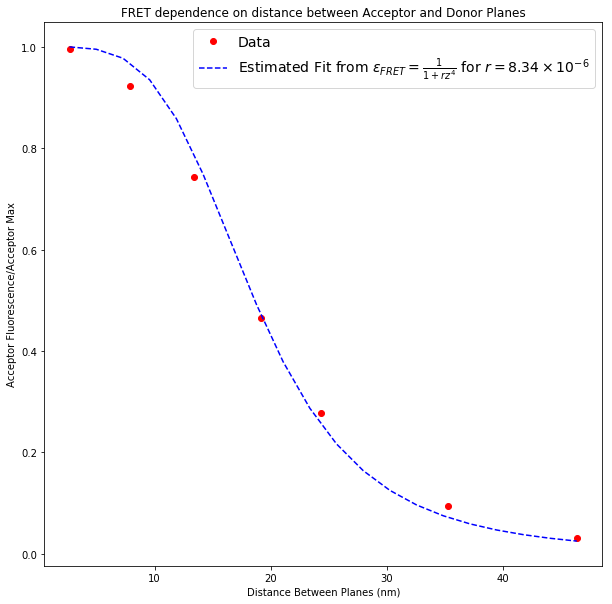

In [32]:
best_rnew = 8.333333333333334e-06 # best value, tuned from visualizing graphs above
z_vals = np.linspace(min(dist), max(dist), 20)
e_vals = E_fret(best_rnew, z_vals)

plt.figure(figsize=(10,10))
plt.plot(dist, fluor_ratio, 'ro')
plt.plot(z_vals, e_vals, 'b--')
plt.ylabel("Acceptor Fluorescence/Acceptor Max")
plt.xlabel("Distance Between Planes (nm)")
plt.title('FRET dependence on distance between Acceptor and Donor Planes')
plt.legend(['Data', r'Estimated Fit from $\varepsilon_{FRET} = \frac{1}{1 + r z^4}$ for $r=8.34 \times 10^{-6}$'],
           fontsize=14)
plt.show()


# Problem 3.3

## Part a

Using the formula $p_y = \dfrac{p_x}{|f'(x)|}$: 

$p_y = \dfrac{1}{\beta x^{-1}}  = \dfrac{x}{\beta} = \dfrac{1}{\beta} e^{\frac{-y}{\beta}}$

This is an exponential with expected value = $\beta$

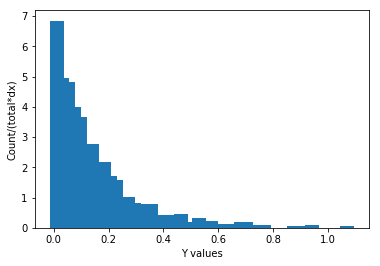

0.15075781910030578


In [133]:
N_samples = 1000
random_x = random(N_samples)
beta = .15
exp_y = -beta*(np.log(random_x))
mycounts, mybins = np.histogram(exp_y,50)
dx = mybins[1] - mybins[0]
mybins = mybins[:-1] + dx/2 # discard the last edge, shift others
plt.figure()
plt.bar(mybins, mycounts/(dx*N_samples), width=.05)
plt.xlabel("Y values")
plt.ylabel("Count/(total*dx)")
plt.show()

print(np.mean(exp_y))

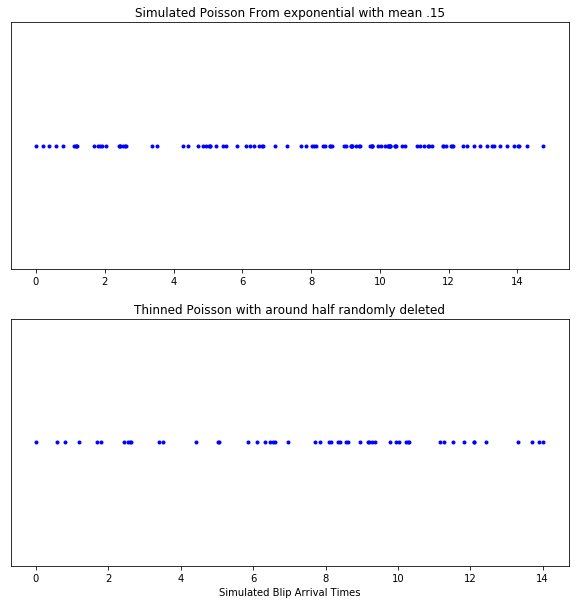

In [142]:
simulated_arrivals = np.cumsum(exp_y)
random_mask = random(1000)>.5
thinned_arrivals = simulated_arrivals[random_mask]
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
window = simulated_arrivals[simulated_arrivals<15]
plt.plot(window, np.ones(len(window)), 'bo', markersize=3)
plt.title("Simulated Poisson From exponential with mean .15")

plt.subplot(2,1,2)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
window = thinned_arrivals[thinned_arrivals<15]
plt.plot(window, np.ones(len(window)), 'bo', markersize=3)
plt.xlabel("Simulated Blip Arrival Times")
plt.title("Thinned Poisson with around half randomly deleted")
plt.show()

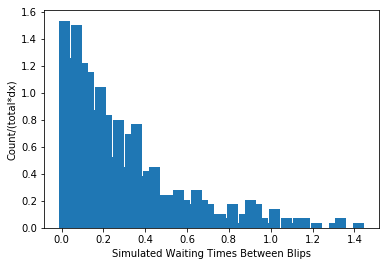

0.29800661455377386


In [145]:
exp_thinned = np.diff(thinned_arrivals)
mycounts, mybins = np.histogram(exp_thinned,50)
dx = mybins[1] - mybins[0]
mybins = mybins[:-1] + dx/2 # discard the last edge, shift others
plt.figure()
plt.bar(mybins, mycounts/(dx*N_samples), width=.05)
plt.xlabel("Simulated Waiting Times Between Blips")
plt.ylabel("Count/(total*dx)")
plt.show()

print(np.mean(exp_thinned))

Thinning the Poisson process by randomly deleting half of the arrival times led to a new waiting time exponential distribution with the expected value = half of the previous value. Earlier we chose $\beta = 0.15$, here $\beta = 0.3$